# Insurance Costs Prediction using Ensemble Learners

This project aims to determine how well several ensemble methods are used to predict the medical insurance cost. The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability (robustness) over a single estimator. The methods used are:

- Random Forest
- AdaBoost
- Gradient Boosting Tree

*** 
Variables used are :

- charges   : individual medical costs billed by health insurance
- age‎‎ : age of primary beneficiary
- sex       ‎: insurance contractor gender, female, male
- bmi       : body mass index
- children  : number of children covered by health insurance
- smoker    : smoking
- region    : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

***


Import Library

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

Load Dataset

In [4]:
dataset = pd.read_csv("D:\Documents\Programming\Datasets\Medical Cost Personal/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


It can be seen that some variables such as sex, smoking, and region are not yet numeric, therefore the LabelEncoder function is used to encode the data form to numeric.

In [5]:
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])
dataset['smoker'] = label_encoder.fit_transform(dataset['smoker'])
dataset['region'] = label_encoder.fit_transform(dataset['region'])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Shows descriptive statistics of the dataset

In [6]:
dataset.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Shows Pearson's correlation from the independent variable to the dependent variable (charges)

In [7]:
dataset.corr(method = 'pearson')['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

It can be seen that smokers have a high correlation with medical insurance costs, and regions have a low correlation with insurance costs, so that the next column region will be dropped

In [8]:
dataset = dataset.drop(['region'], axis=1)
dataset.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


Separating dependent variables and independent variables

In [9]:
x = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5:6]

Data scaling using StandardScaler

In [10]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Splitting data into train and test set

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070, 1)
(268, 1)


Building Gradient Boosting, Random Forest, and AdaBoost models

In [12]:
gb = GradientBoostingRegressor().fit(x_train, y_train)

# Training
gb_train_pred = gb.predict(x_train)
gb_r_sq = gb.score(x_train,y_train)
gb_mse = mean_squared_error(y_train, gb_train_pred)
gb_rmse = np.sqrt(gb_mse)

# Testing
gb_test_pred = gb.predict(x_test)
gb_test_r_sq = gb.score(x_test,y_test)
gb_test_mse = mean_squared_error(y_test, gb_test_pred)
gb_test_rmse = np.sqrt(gb_test_mse)

In [13]:
rf = RandomForestRegressor().fit(x_train, y_train)

# Training
rf_train_pred = rf.predict(x_train)
rf_r_sq = rf.score(x_train,y_train)
rf_mse = mean_squared_error(y_train, rf_train_pred)
rf_rmse = np.sqrt(rf_mse)

# Testing
rf_test_pred = rf.predict(x_test)
rf_test_r_sq = rf.score(x_test,y_test)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(rf_test_mse)

In [14]:
adaboost = AdaBoostRegressor().fit(x_train, y_train)

# Training
adaboost_train_pred = adaboost.predict(x_train)
adaboost_r_sq = adaboost.score(x_train,y_train)
adaboost_mse = mean_squared_error(y_train, adaboost_train_pred)
adaboost_rmse = np.sqrt(adaboost_mse)

# Testing
adaboost_test_pred = adaboost.predict(x_test)
adaboost_test_r_sq = adaboost.score(x_test,y_test)
adaboost_test_mse = mean_squared_error(y_test, adaboost_test_pred)
adaboost_test_rmse = np.sqrt(adaboost_test_mse)

In [29]:
print('Gradient Boosting   | Training :', round(gb_r_sq, 3), '| Testing :', round(gb_test_r_sq, 3))
print('Random Forest       | Training :', round(rf_r_sq, 3), '| Testing :', round(rf_test_r_sq, 3))
print('AdaBoost            | Training :', round(adaboost_r_sq, 3), '| Testing :', round(adaboost_test_r_sq, 3))

Gradient Boosting   | Training : 0.896 | Testing : 0.878
Random Forest       | Training : 0.973 | Testing : 0.86
AdaBoost            | Training : 0.802 | Testing : 0.795


In [30]:
print('Gradient Boosting  | Training :', round(gb_rmse, 2), '| Testing :', round(gb_test_rmse, 2))
print('Random Forest      | Training :', round(rf_rmse, 2), '| Testing :', round(rf_test_rmse, 2))
print('AdaBoost           | Training :', round(adaboost_rmse, 2), '| Testing :', round(adaboost_test_rmse, 2))

Gradient Boosting  | Training : 3874.55 | Testing : 4351.77
Random Forest      | Training : 1973.48 | Testing : 4667.28
AdaBoost           | Training : 5350.68 | Testing : 5641.06


From the three models that have been built above, it can be seen that the Gradient Boosting model is decent with obtained R2 = 0.878 and RMSE = 4351.77 based on testing in the test set. These results can still be improved by adjusting the parameter.

Shows Gradient Boosting observation vs prediction plot on train and test set

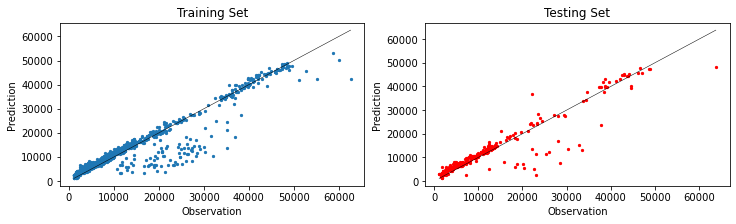

In [33]:
fig=plt.figure(figsize=(12,3))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, gb_train_pred, s=5)
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k', lw=0.5)
ax1.set_title('Training Set')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Prediction')

ax2=plt.subplot(1,2,2)
ax2.scatter(y_test, gb_test_pred, s=5, c='r')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=0.5)
ax2.set_title('Testing Set')
ax2.set_xlabel('Observation')
ax2.set_ylabel('Prediction')

plt.show()